# Imports

In [1]:
import pandas as pd
from pathlib import Path
import sys
import os
import seaborn as sns
import matplotlib.pyplot as plt

project_dir = Path('__main__').resolve().parents[1]
sys.path.append(f'{project_dir}/')

from src.node import Node, Status

# Analysis

In [2]:
df = pd.read_csv(os.path.join(project_dir, 'data', 'aleatorios', 'aleatorio_0_999', 'resultado.csv'), delimiter=',')

In [3]:
df['distance'] = df.distance.apply(lambda x: (x+999)*-1 if x < 0 else x)

In [4]:
df.head()

,Unnamed: 0,origem,destino,distance,STEPS_Status.FULL_JUMP,STEPS_Status.SINGLE_JUMP,STEPS_Status.SEQUENTIAL
0,0,798,781,-982,65,969,984
1,1,535,46,-510,36,497,512
2,2,188,200,12,3,6,13
3,3,118,408,290,20,276,291
4,4,677,343,-665,44,652,667


In [5]:
df_aux = df[['distance', 'STEPS_Status.FULL_JUMP', 'STEPS_Status.SINGLE_JUMP', 'STEPS_Status.SEQUENTIAL']].groupby('distance').mean()

In [6]:
df_aux.head()

,STEPS_Status.FULL_JUMP,STEPS_Status.SINGLE_JUMP,STEPS_Status.SEQUENTIAL
distance,,,
-998,66.0,985.0,1000.0
-997,65.0,984.0,999.0
-996,65.0,983.0,998.0
-995,64.0,982.0,997.0
-994,65.0,981.0,996.0


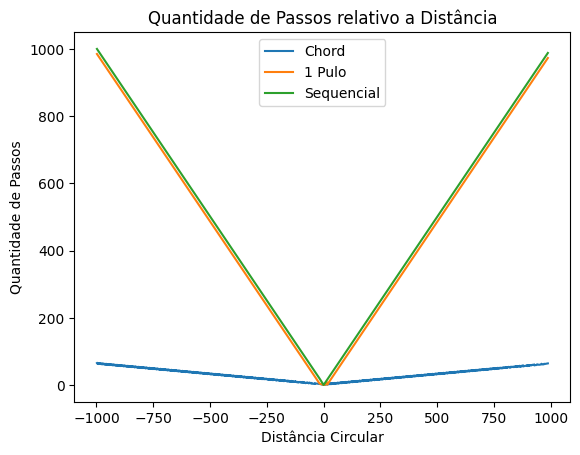

In [7]:
ax = df_aux.plot(kind='line')

# Adicionando rótulos e título ao gráfico
plt.xlabel('Distância Circular')
plt.ylabel('Quantidade de Passos')
plt.title('Quantidade de Passos relativo a Distância')

ax.legend(['Chord', '1 Pulo', 'Sequencial'])

# Exibindo o gráfico
plt.show()

In [8]:
df_aux[df_aux.index == 0].head()

,STEPS_Status.FULL_JUMP,STEPS_Status.SINGLE_JUMP,STEPS_Status.SEQUENTIAL
distance,,,
0,1.0,1.0,1.0


In [10]:
df[df.distance >= -980]

,Unnamed: 0,origem,destino,distance,STEPS_Status.FULL_JUMP,STEPS_Status.SINGLE_JUMP,STEPS_Status.SEQUENTIAL
1,1,535,46,-510,36,497,512
2,2,188,200,12,3,6,13
3,3,118,408,290,20,276,291
4,4,677,343,-665,44,652,667
5,5,662,925,263,20,249,264
...,...,...,...,...,...,...,...
9995,9995,677,352,-674,45,661,676
9996,9996,910,273,-362,26,349,364
9997,9997,111,677,566,38,552,567
9998,9998,507,384,-876,58,863,878


#